# Trulia Rental Listings 

This jupyter notebook provides my solution to the Data Exericse for the Trulia position of Economic Data Analyst. 

I will be approaching this problem in a very structured manner.  

### 1. Load Packages and Data

### 2. Clean Data

### 3. Identify "English Basements"

### 4. Exploratory Data Analysis 

### 5. Explore relationship of "English Basements" in terms of price and location 

### 6.  Conclusion 


I have chosen to do this exercise in python3 and display my code and comments in a jupyter notebook

### 1. Load Packages and Data

I will be using pandas, numpy, matplotlib and seaborn for this Data Exercise.  While there are many packages and modules that may be of use, these are my go to "tools" in my data analysis toolbox.

In [1037]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



#### Load the Data set into a Pandas DataFrame 

In [1038]:
trulia = pd.read_csv("Trulia_RentalListings_DataExercise.csv", encoding = 'iso-8859-1')

Why am I specifying encoding = 'iso-8859-1' ? 

I recieved an error when I did not specify encoding.  Pandas default tries to load data with UTF-8 encoding, when  I speficied encoding as 'iso-8859-1' the dataset loaded properly into a PandasDataFrame
__________

I also check that a dataset has been loaded propertly by using .head(), and this gives me a great introduction to the dataset

In [1039]:
trulia.head()

,PropertyID,ListingDate,Latitude,Longitude,ZipCode,CityName,CountyName,StateName,CountyListingCoverage,LeasePriceDollarCnt,LeaseTermMonths,FinishedSquareFeet,Bedrooms,Bathrooms,BuiltYear,ListingDescription
0,391329,3/2/16,38899907,-77056204,20037,Washington,District of Columbia,DC,0.89,4100.0,12,1800,2.0,2.5,NaN,"This 2 BR, 2.5 bath unit has an abundant amount of natural sunlight, a large terrace and a breathtaking view of the Potomac River. \r\n\r\nWalking distance to Georgetown waterfront, Foggy Bottom Metro, George Washington University & University Hospital, Whole Foods and restaurants."
1,391331,1/10/15,38905551,-77053871,20037,Washington,District of Columbia,DC,0.89,3200.0,12,863,0.0,2.0,NaN,"HUGE STEAM ROOM/SAUNA! In this open loft with amazing views, private terrace, nearly $100,000k of high-end updates:Caesarstone counter tops, Blue Cellini- style Ultra Craft cabinets, GE Profile and Bosch stainless appliances, Euro-style bath finishes, including Huge steam shower/sauna. Step down living room, Murphy bed, and flat screen TV, built-ins. On-site manager, Pet friendly, roof terrace, rental park $205/mo. ASK ABOUT EXCITING PLANS FOR BUILDING."
2,391331,1/10/15,38905551,-77053871,20037,Washington,District of Columbia,DC,0.89,3200.0,12,863,0.0,2.0,NaN,"Amazing views! in this cool open space with large Euro-style kitchen perfect for entertaining, stainless appliances, Ultra craft appliances, terrace, huge private steam shower, extra half bath. Building features 7 day concierge, roof terrace, pet friendly, garage parking $205/mo. Near Trader Joes, 2 metros, Four Seasons, Ritz Carlton.Amazing Views! in this cool furnished flat, perfect for entertaining; has large open Euro-style kitchen with stainless appliances, terrace, bamboo flooring, powder room, washer/dryer, huge steam sauna; building has 7-day concierge, roof terrace, garage rental parking. Near Trader Joes and 2 metros."
3,391377,5/10/16,38904110,-77054247,20037,Washington,District of Columbia,DC,0.89,3350.0,12,847,1.0,1.0,NaN,"Urban living space is now available for rent in this very well located West End condo building. Features a spacious, living room/dining room combination with a wall of windows overlooking a private terrace, a kitchen with updated appliances, laundry closet, large bedroom, and great closet space. The terrace has approximately 400 sq. ft. of outdoor space. One car garage parking included."
4,391416,7/1/16,38903981,-77054160,20037,Washington,District of Columbia,DC,0.89,3100.0,12,845,1.0,1.0,NaN,"The Westbridge is a contemporary building located in desirable West End and walking distance to Foggy Bottom METRO and GW. Building Amenities: 24 hr staffed front desk, fitness center, pool, lounging area, rooftop deck and garage parking. This 1 bedroom, 1 bathroom unit has been beautifully updated with granite counter tops in kitchen and bathroom, stainless steel appliances, hardwood floors, washer & dryer, many closets, and a balcony. parking and storage is included.\r\n\r\n1-5 Year Term Available. Application Fee: $50. Move in Fee: $400. Repair deductible: $100. Rent includes: Parking, Additional Storage Space, Trash Removal, Water and Sewer, Party Room, Recreational Facility. Tenant is responsible for Electric."


Calling .shape on a DataFrame allows me to see the shape of the data.  

The output of calling .shape is a list where the x = the number of rows in the dataset & y = the number of columns in the dataset.

In [1040]:
trulia.shape

(30961, 16)

There are 30961 records and 16 columns in the dataset 
__________


After checking the shape of the DataFrame, I typically look at the column names. Sometimes there are spacs in the column names that need to be removed, as spaces are very "un-pythonic."  

In [1041]:
trulia.columns

Index(['PropertyID', 'ListingDate', 'Latitude', 'Longitude', 'ZipCode', 'CityName', 'CountyName', 'StateName', 'CountyListingCoverage', 'LeasePriceDollarCnt', 'LeaseTermMonths', 'FinishedSquareFeet', 'Bedrooms', 'Bathrooms', 'BuiltYear', 'ListingDescription'], dtype='object')

### 2. Clean Data

Now that the dataset has been loaded and I have a basic understanding of the data I'm working with, it's time to begin to investigate the data.  It's always a good idea to call .info() on the DataFrame.  

Calling .info() allows you to first see how many null values are in each column and also see what data type each column is.  

In [1042]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30961 entries, 0 to 30960
Data columns (total 16 columns):
PropertyID               30961 non-null int64
ListingDate              30961 non-null object
Latitude                 30961 non-null int64
Longitude                30961 non-null int64
ZipCode                  30961 non-null int64
CityName                 30366 non-null object
CountyName               30961 non-null object
StateName                30366 non-null object
CountyListingCoverage    30961 non-null object
LeasePriceDollarCnt      30780 non-null float64
LeaseTermMonths          30961 non-null int64
FinishedSquareFeet       30961 non-null int64
Bedrooms                 30958 non-null float64
Bathrooms                30961 non-null float64
BuiltYear                6589 non-null float64
ListingDescription       29797 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 3.8+ MB


CityName, StateName , LeasePriceDollarCnt , Bedrooms, BuiltYear and ListingDescription all have null values 

In [1043]:

cityname_null = (30961 - 30366 )
statename_null = (30961 - 30366)
leasepricedollarcnt_null = (30961 - 30780)
bedrooms_null = (30961 - 30958)
builtyear_null = (30961 - 6589)
listingdescription_null = (30961 - 29797)

print ("CityName has {} null values\n".format(cityname_null))
print ("StateName has {} null values\n".format(statename_null))
print ("LeasePriceDollarCnt has {} null values\n".format(leasepricedollarcnt_null))
print ("Bedrooms has {} null values\n".format(bedrooms_null))
print ("BuiltYear has {} null values\n".format(builtyear_null))
print ("ListingDescription has {} null values\n".format(listingdescription_null))

CityName has 595 null values

StateName has 595 null values

LeasePriceDollarCnt has 181 null values

Bedrooms has 3 null values

BuiltYear has 24372 null values

ListingDescription has 1164 null values



### A LOT OF NULL VALUES ! 

Anytime I see null values, I want to inspect the columns to see what I should do with the values. 

My options for dealing with null values include 


1) dropping records that feature null values in one or more of the columns 

2) changing the null values to another value like the Mean for instance , this is called imputation 

3) changing the null value to another value based on domain knowledge of the dataset

4) dropping a column that features a lot of null values 


Before deciding on which method to use with each column, a look at the data inside is important.  

##### I always consider how many total records there are when deciding what to do. Sometimes, it makes more sense to drop null values vs imputing or changing their value 

In [1044]:
#first to look at CityName column, I want to look at all the unique values

trulia["CityName"].unique()

array(['Washington', 'Alexandria', 'Arlington', 'Culpeper', 'Jeffersonton',
       'Amissville', 'Boston', 'Falls Church', 'Markham', 'Delaplane',
       'Upperville', 'Remington', 'Manassas', 'Bealeton', 'Sumerduck',
       'Hume', 'Marshall', 'Warrenton', 'The Plains', 'Midland',
       'Broad Run', 'Catlett', 'Nokesville', 'Fredericksburg', 'Fairfax',
       'Sterling', 'Great Falls', 'Ashburn', 'Leesburg', 'Chantilly',
       'Aldie', 'Lovettsville', 'Waterford', 'Paeonian Springs',
       'Hamilton', 'Purcellville', 'Middleburg', 'Hillsboro', 'Round Hill',
       'Triangle', 'Woodbridge', 'Dumfries', 'Haymarket', 'Yorkshire',
       'Gainesville', 'West Gate', 'Loch Lomond', 'Quantico', nan,
       'Bristow', 'Stafford', 'Dowell', 'Saint Leonard', 'Broomes Island',
       'Solomons', 'Lusby', 'Port Republic', 'Huntingtown',
       'Chesapeake Beach', 'Prince Frederick', 'Dunkirk', 'North Beach',
       'Marbury', 'Indian Head', 'La Plata', 'Bel Alton', 'Nanjemoy',
       'Mechanic

The first thing I notice when looking at the unique City names is that the dataset includeds much more than Washington DC.  The Dataset features the DC Metro Area.  

<img src = "https://upload.wikimedia.org/wikipedia/commons/5/5f/Washington_DC_metropolitan_map.jpg ">

credit:  https://en.wikipedia.org/wiki/Washington_metropolitan_area

In [1045]:
# I may be able to deduce the city names ZipCode! 

In [1046]:
missing_city_name = trulia[trulia['CityName'].isnull()] 


zips_to_null_city_name = missing_state_name["ZipCode"].unique()
print("These are the ZipCodes to the Missing CityNames {}".format(zips_to_null_city_name))

These are the ZipCodes to the Missing CityNames [20111 21758 20882 20879 20854 20874 20878 20850 20817 20853 20877 20886
 20855 20815 20895 20784 20785 20746 20743 20774 20745 20748 20706 20772
 20712 20740 20783 20737 22311 22302 22312 22039 22315 20770]


In [1047]:
trulia[trulia.ZipCode == 20111]

zip_20111 = trulia[(trulia.ZipCode == 20111)]

zip_20111.CityName.unique()


array(['Yorkshire', nan, 'Manassas Park', 'Loch Lomond'], dtype=object)

I'm noticing a problem when inspecting the first zipcode 20111.  The Zipcode is actually associated with a few different CityNames, Yorkshire, Manaassas Park and Loch Lomond. 

In [1048]:
trulia[trulia.ZipCode == 21758]

zip_21758 = trulia[(trulia.ZipCode == 21758)]

zip_21758.CityName.unique()


array([nan], dtype=object)

In [1049]:
trulia[trulia.ZipCode == 20882]

zip_20882 = trulia[(trulia.ZipCode == 20882)]

zip_20882.CityName.unique()



array([nan], dtype=object)

### Making an executive decision on Missing City Names ...


I am noticing a pattern.  ZipCodes in this dataset relate to many cities.  It's going to be hard to deduce CityNames from the zips with out other domain knowledge. 
One way of dealing with this would be to find shapefiles or geojsons of City boundaries and plot the lat, long of the missing values. By doing a spatial join you could reassign the values.  

Both City and StateName both have 595 null vallues, this accounts for ~ 2% of the data. As much as I want to solve the issue, 2% of the data is very low.  By removing the values, I will still have enough data to perform the analysis on. 

I have also run the analysis with out dropping the null values and didn't find much of a difference.  

In [1050]:
trulia = trulia[trulia['CityName'].notnull()]

In [1051]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30366 entries, 0 to 30960
Data columns (total 16 columns):
PropertyID               30366 non-null int64
ListingDate              30366 non-null object
Latitude                 30366 non-null int64
Longitude                30366 non-null int64
ZipCode                  30366 non-null int64
CityName                 30366 non-null object
CountyName               30366 non-null object
StateName                30366 non-null object
CountyListingCoverage    30366 non-null object
LeasePriceDollarCnt      30186 non-null float64
LeaseTermMonths          30366 non-null int64
FinishedSquareFeet       30366 non-null int64
Bedrooms                 30363 non-null float64
Bathrooms                30366 non-null float64
BuiltYear                6530 non-null float64
ListingDescription       29226 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 3.9+ MB



________


LeasePriceDollarCnt has only 181 null values,  I can probably get rid of those or better yet, I can impute.  I'm imputing because there are only 181 values that need to be replaced 

In [1052]:
trulia["LeasePriceDollarCnt"].mean()

2265.637646591135

In [1053]:
trulia[["LeasePriceDollarCnt"]] = trulia[["LeasePriceDollarCnt"]].apply(lambda x: x.fillna(x.mean()))

#Alternatively I could have also written this code trulia["LeasePriceDollarCnt"].fillna((trulia["LeasePriceDollarCnt"].mean()))

print(trulia.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30366 entries, 0 to 30960
Data columns (total 16 columns):
PropertyID               30366 non-null int64
ListingDate              30366 non-null object
Latitude                 30366 non-null int64
Longitude                30366 non-null int64
ZipCode                  30366 non-null int64
CityName                 30366 non-null object
CountyName               30366 non-null object
StateName                30366 non-null object
CountyListingCoverage    30366 non-null object
LeasePriceDollarCnt      30366 non-null float64
LeaseTermMonths          30366 non-null int64
FinishedSquareFeet       30366 non-null int64
Bedrooms                 30363 non-null float64
Bathrooms                30366 non-null float64
BuiltYear                6530 non-null float64
ListingDescription       29226 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 3.9+ MB
None


_______

Since there are only 3 null values for bedrooms, I can drop the data 


In [1054]:
trulia = trulia[trulia['Bedrooms'].notnull()]

In [1055]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30363 entries, 0 to 30960
Data columns (total 16 columns):
PropertyID               30363 non-null int64
ListingDate              30363 non-null object
Latitude                 30363 non-null int64
Longitude                30363 non-null int64
ZipCode                  30363 non-null int64
CityName                 30363 non-null object
CountyName               30363 non-null object
StateName                30363 non-null object
CountyListingCoverage    30363 non-null object
LeasePriceDollarCnt      30363 non-null float64
LeaseTermMonths          30363 non-null int64
FinishedSquareFeet       30363 non-null int64
Bedrooms                 30363 non-null float64
Bathrooms                30363 non-null float64
BuiltYear                6529 non-null float64
ListingDescription       29224 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 3.9+ MB



___________
Built year by far, has the most null values, might be good to see on a historgram the distribution. I want to make an educated decision regarding the null values.  


The Median Year houses were build in this dataset is 2006.0


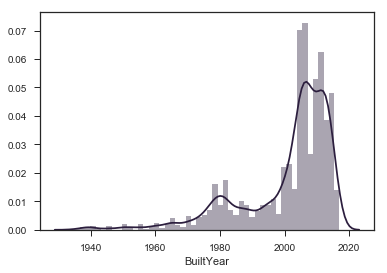

In [1056]:
built_year = trulia[trulia['BuiltYear'].notnull()]

distplot = sns.distplot(built_year["BuiltYear"])

print("The Median Year houses were build in this dataset is {}".format(built_year["BuiltYear"].median()))

The data falls within 1940 to present and is skewed to the left.  The median built year is 2006 (wow, lots of new construction!) 

Since there are a lot of null values. I want to see how important Built year  is to the data set.  

In [1057]:
trulia_copy = trulia.filter(["ZipCode", "BuiltYear"])

In [1058]:
trulia_copy.corr()

,ZipCode,BuiltYear
ZipCode,1.000000,-0.143301
BuiltYear,-0.143301,1.000000


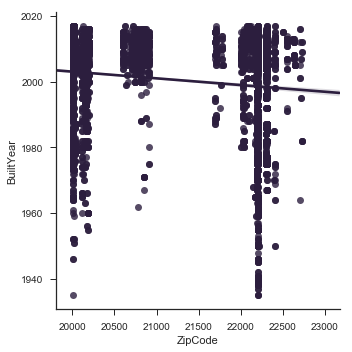

In [1059]:
sns.lmplot("ZipCode", "BuiltYear", data = trulia_copy)


This tells me that there's no meaningful relationship between zipcode and built year, which is surpriseing considering how i thought development occured in the DC metro area

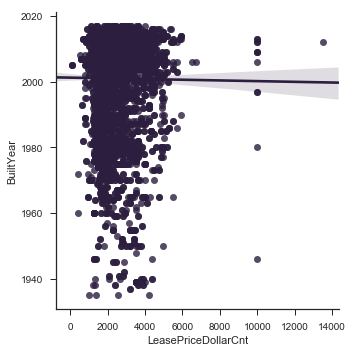

In [1060]:
trulia_copy = trulia.filter(["BuiltYear", "LeasePriceDollarCnt"])
trulia_copy.corr()

sns.lmplot("LeasePriceDollarCnt", "BuiltYear", data = trulia_copy)

I think at this point it's just time to drop the column Built Year :( 

I really dislike having to drop data, but there are just so many null values in this column, it's best to just drop the column. 

In [1061]:
trulia.drop("BuiltYear", axis=1, inplace=True)

In [1062]:
trulia.columns

Index(['PropertyID', 'ListingDate', 'Latitude', 'Longitude', 'ZipCode', 'CityName', 'CountyName', 'StateName', 'CountyListingCoverage', 'LeasePriceDollarCnt', 'LeaseTermMonths', 'FinishedSquareFeet', 'Bedrooms', 'Bathrooms', 'ListingDescription'], dtype='object')

In [1063]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30363 entries, 0 to 30960
Data columns (total 15 columns):
PropertyID               30363 non-null int64
ListingDate              30363 non-null object
Latitude                 30363 non-null int64
Longitude                30363 non-null int64
ZipCode                  30363 non-null int64
CityName                 30363 non-null object
CountyName               30363 non-null object
StateName                30363 non-null object
CountyListingCoverage    30363 non-null object
LeasePriceDollarCnt      30363 non-null float64
LeaseTermMonths          30363 non-null int64
FinishedSquareFeet       30363 non-null int64
Bedrooms                 30363 non-null float64
Bathrooms                30363 non-null float64
ListingDescription       29224 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 5.0+ MB


________

Now time to deal with the Listing Description.  Since this is the column I am going to be utilizng to use to find "English Bedrooms" , I think it's fair to say I can drop all the records with no listing description 

In [1064]:
trulia = trulia[trulia['ListingDescription'].notnull()]

In [1065]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29224 entries, 0 to 30960
Data columns (total 15 columns):
PropertyID               29224 non-null int64
ListingDate              29224 non-null object
Latitude                 29224 non-null int64
Longitude                29224 non-null int64
ZipCode                  29224 non-null int64
CityName                 29224 non-null object
CountyName               29224 non-null object
StateName                29224 non-null object
CountyListingCoverage    29224 non-null object
LeasePriceDollarCnt      29224 non-null float64
LeaseTermMonths          29224 non-null int64
FinishedSquareFeet       29224 non-null int64
Bedrooms                 29224 non-null float64
Bathrooms                29224 non-null float64
ListingDescription       29224 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 3.6+ MB


_________

### 3. Identify "English Basements"

There are a few ways of finding "English basements" in the ListingDescription column. 

1. Regular Expressions / RegEX 

2. string method str.extract

3. string method str.contains 



#### Regular Expressions 

Regular expressings allow you to enter a string of spefified characters that allow you to look for a pattern in text data.  

\d --> any digit [0 - 9]

\D --> non digit 

\s --> white space character , tab, space, new line, return 

\S --> non white space character 

\w --> any alpha numeric chaeracter [a - z ; A - Z, 0 - 9]

\W --> any non alpha numerica character [*, @ ,# ,$, % etc]
                                         
                                        __________________
                                      
.  --> matches any character 

^ --> matches start of string 

$ --> matches end of string

* --> matches repitions for instance "bc*" matches "b", "bc" or "bcccccccccccc"

+ --> matches 1 or more of characters for istance "bc+" matches "b" and then any number of "c"s

? --> matches 0 or 1 repition "bc?" matches "b" or "bc"


###### there's a lot more but these are just the basics that I will use ... regex is fun, complex, and a lot at times! 

(source: https://zeroturnaround.com/rebellabs/java-regular-expressions-cheat-sheet/) 

                                        __________________


I am looking for "English Basements" 

--> English Basement



(E|e).\w+\s(B|b).\w+(ment)


--> basement 



(B|b)asement




In [1066]:



basements = trulia[trulia.ListingDescription.str.contains(r"[B|b]asement")]

print ("Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded {} records"
       .format(basements.shape[0]))



Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded 6874 records


In [1067]:
basements["ListingDescription"].head()

42    $1975 spacious 1 BR 1 BA apartment available beginning June 1st. \r\n\r\nLOCATION! LOCATION! LOCATION! \r\n\r\nThis sunny and bright condo is located on the 6th floor of a beautiful art deco building called The Bader, at 2515 K Street. Centrally located in Foggy Bottom; 2 minute walk to the metro (orange/blue/silver line), George Washington University, World Bank, State Department, Georgetown, Georgetown Harbor, AMC Movie Theatre, Trader Joes, Whole Foods, restaurants, bars and the 30N, 30S, 31, 38B, L1 and L3 bus stops, and the Circulator Bus. \r\n\r\nRent includes all utilities as well as extra storage in the basement with a bike room to store your bike as well. Amenities in the building include a beautiful courtyard with tables and bbq grills, a large laundry room and an expansive roof deck with incredible views of Georgetown and the Potomac River. No parking spot available with building. Courtyard and rooftop deck are available for private reservations without a fee! \r\n\r\n

Looking at the results that Basement pulled makes me think it's bit too broad...Time to narrow down the expression to capture only what's really an english basment.

In [1068]:


english_basement = trulia[trulia.ListingDescription.str.contains(r'(E|e).\w+\s(B|b).\w+(ment)')]

print ("Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded {} records"
       .format(english_basement.shape[0]))




Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded 1104 records


In [1069]:
english_basement["ListingDescription"].head(1)

49    2-bedroom furnished apartment in Foggy Bottom / West End area (25th and K St NW) with garage parking.  Available now.  Two blocks to Foggy Bottom metro, one block to Trader Joe's, three blocks to Whole Foods, GW School of Medicine, and GW Hospital.  Walking distance to Dupont circle, IMF, World Bank, Kennedy Center, White House, etc.\r\n\r\nOne parking spot in secure basement garage is included.  Additional spots are usually available to rent.  Roof deck with views of Georgetown, Potomac, and Virginia.  One bedroom is fully furnished, second bedroom furnished upon request.  Additional furniture is available; alternatively, existing furniture can be removed if desired.\r\n\r\nFully furnished new, high-end kitchen.  Stocked kitchen includes plates, glasses, silverware, and cooking equipment (removed upon request).  In-unit washer/dryer.  Water/trash/sewer included.  Pass-through billing for electrical and cable/internet available.  One-year lease preferred but negotiable.\r\n\r\nLo

I am going to inspect some of the ListingDescriptions from both english_basement and basement to see which one is more accurate to the needs of the challenge and the analysis.

In [1071]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 2000)
english_basement["ListingDescription"].head(6)

49     2-bedroom furnished apartment in Foggy Bottom / West End area (25th and K St NW) with garage parking.  Available now.  Two blocks to Foggy Bottom metro, one block to Trader Joe's, three blocks to Whole Foods, GW School of Medicine, and GW Hospital.  Walking distance to Dupont circle, IMF, World Bank, Kennedy Center, White House, etc.\r\n\r\nOne parking spot in secure basement garage is included.  Additional spots are usually available to rent.  Roof deck with views of Georgetown, Potomac, and Virginia.  One bedroom is fully furnished, second bedroom furnished upon request.  Additional furniture is available; alternatively, existing furniture can be removed if desired.\r\n\r\nFully furnished new, high-end kitchen.  Stocked kitchen includes plates, glasses, silverware, and cooking equipment (removed upon request).  In-unit washer/dryer.  Water/trash/sewer included.  Pass-through billing for electrical and cable/internet available.  One-year lease preferred but negotiable.\r\n\r\nL

___________________

It looks like I can add a regular expression for basement apartment as well and then create a new dataframe that features, english basements and basement apartments.  

In [1072]:
basement_apartment = trulia[trulia.ListingDescription.str.contains(r'(B|b).\w+(ment)\s(A|p).\w+(ment)')]

print ("Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded {} records"
       .format(basement_apartment.shape[0]))

Creating a regular expression to pull 'basement' from the ListingDescrition column yeilded 26 records


In [1073]:
basement_apartment["ListingDescription"].head(4)

527     Open house Sunday, August 2 from 1 - 3 PM.\r\n\r\nReduced rent! $1,890 per month plus utilities. Available for move in beginning August 15th. Charming One Bedroom Renovated English Basement Apartment in the 1700 Block of Church Street, NW. Modern Kitchen with Dishwasher and Microwave. Washer-Dryer in the apartment. Separate entrances front and back. Plenty of closet space including large walk-in closet/storage room. Alcove in apt for a small office area. Ceramic tile floors throughout. Brand new Samsung washer just installed. Security bars and ADT security system.\r\n\r\nMany amenities a short walk away including: \r\n\r\n5 minutes to Dupont Circle Metro\r\n3 minutes to Safeway and CVS\r\n6 minutes to Whole Foods\r\n4 minutes to the JCC\r\n8 minutes to National Capitol YMCA\r\nMinutes to a vast selection of restaurants, bars, cleaners, etc on 17th Street, 14th Street, P Street and Connecticut Avenue\r\n30 seconds to newly renovated Keegan Theater across the street\r\n3 minutes 

In [1074]:
english_basements_df = pd.concat([english_basement,basement_apartment]).drop_duplicates().reset_index(drop=True)

In [1075]:
english_basements_df.shape[0]


1113

____________________
The new dataframe that features "basement apartments" and "english basements" has 1113 records.  

### 4. Exploratory Data Analysis 

In my exploratory data analysis phase, I am going to be looking at different parts of the data for the challenge (and to showcase some my skills).

In [1076]:
trulia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29224 entries, 0 to 30960
Data columns (total 15 columns):
PropertyID               29224 non-null int64
ListingDate              29224 non-null object
Latitude                 29224 non-null int64
Longitude                29224 non-null int64
ZipCode                  29224 non-null int64
CityName                 29224 non-null object
CountyName               29224 non-null object
StateName                29224 non-null object
CountyListingCoverage    29224 non-null object
LeasePriceDollarCnt      29224 non-null float64
LeaseTermMonths          29224 non-null int64
FinishedSquareFeet       29224 non-null int64
Bedrooms                 29224 non-null float64
Bathrooms                29224 non-null float64
ListingDescription       29224 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 3.6+ MB


Text(0.5,1,'Correlation')

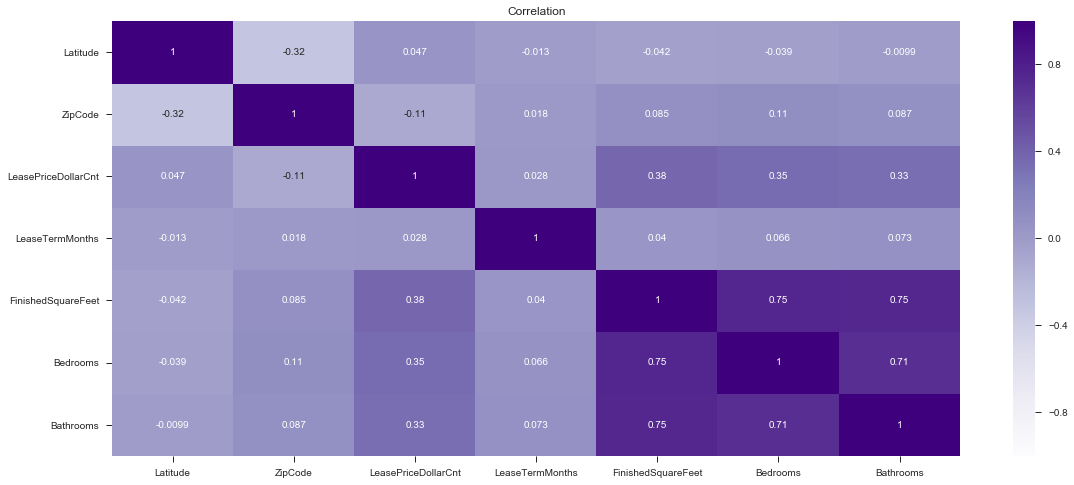

In [1077]:
#I am going to drop all the object columns to see the correlation between different parts of the data set 

trulia_correlation = trulia.filter(["Latitude", "Longitutde", "ZipCode",\
                      "LeasePriceDollarCnt", "LeaseTermMonths", \
                      "FinishedSquareFeet", "Bedrooms", "Bathrooms"])

plt.figure(figsize = (19, 8))
sns.heatmap(trulia_correlation.corr(), cmap="Purples", annot=True).set_title("Correlation")



By looking at the coorelation matrix I can see that Bathrooms, Bedrooms and FinishedSquareFeet are correlated.  

I can also see that LeasePriceDollarCnt only mildly is correlated to Bathrooms, Bedrooms and FinishedSquareFeet. 


In [1078]:
average_bathrooms = round(trulia.Bathrooms.mean(),2)
average_bedrooms = round(trulia.Bedrooms.mean(),2)
average_sq_ft = round(trulia.FinishedSquareFeet.mean(),2)
average_lease = round(trulia.LeasePriceDollarCnt.mean(), 2)

print ("The average amount of Bathrooms is {}".format(average_bathrooms))
print()
print ("The average amount of Bedrooms is {}".format(average_bedrooms))
print()
print ("The average square feet of properties is {} sq ft".format(average_sq_ft))
print()
print ("The price expected to pay for lease per rental per month is ${}".format(average_lease))

The average amount of Bathrooms is 2.16

The average amount of Bedrooms is 2.57

The average square feet of properties is 1456.52 sq ft

The price expected to pay for lease per rental per month is $2266.87


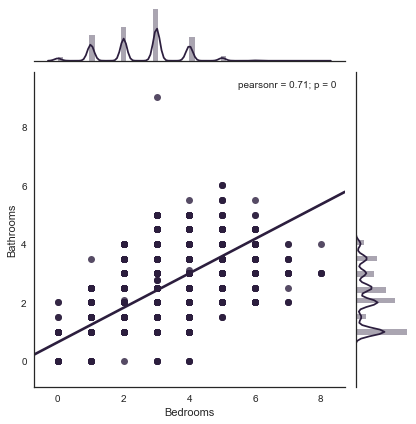

In [1079]:

with sns.axes_style('white'):
    sns.jointplot(x = "Bedrooms", y = "Bathrooms", data = trulia, kind='reg')

There is an obvious relationship between Bedrooms and Bathrooms.  Having worked with a few housing datasets, I know that
occasionally this can be seen a multicollinearity problem.  That is to say that these two features or variables are highly correlated. 
When conducting regression, you want to be very careful about having these types of features in the same model.


______________

It's some times helpful to look at the distribution of data to get a better understanding of the data. 

I'd like to see Lease price in particular 

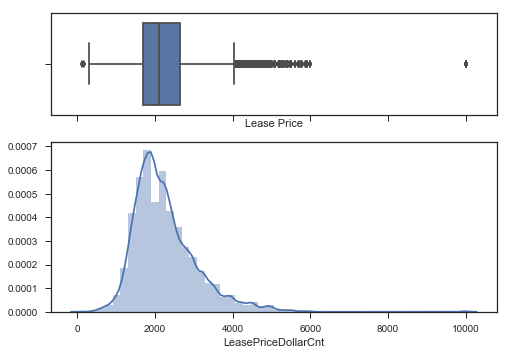

In [1080]:
sns.set(style="ticks")

plt.figure(figsize = (19, 8))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .5)})
 

sns.boxplot(trulia["LeasePriceDollarCnt"], ax=ax_box);
sns.distplot(trulia["LeasePriceDollarCnt"], ax=ax_hist);
 

ax_box.set(xlabel='Lease Price');


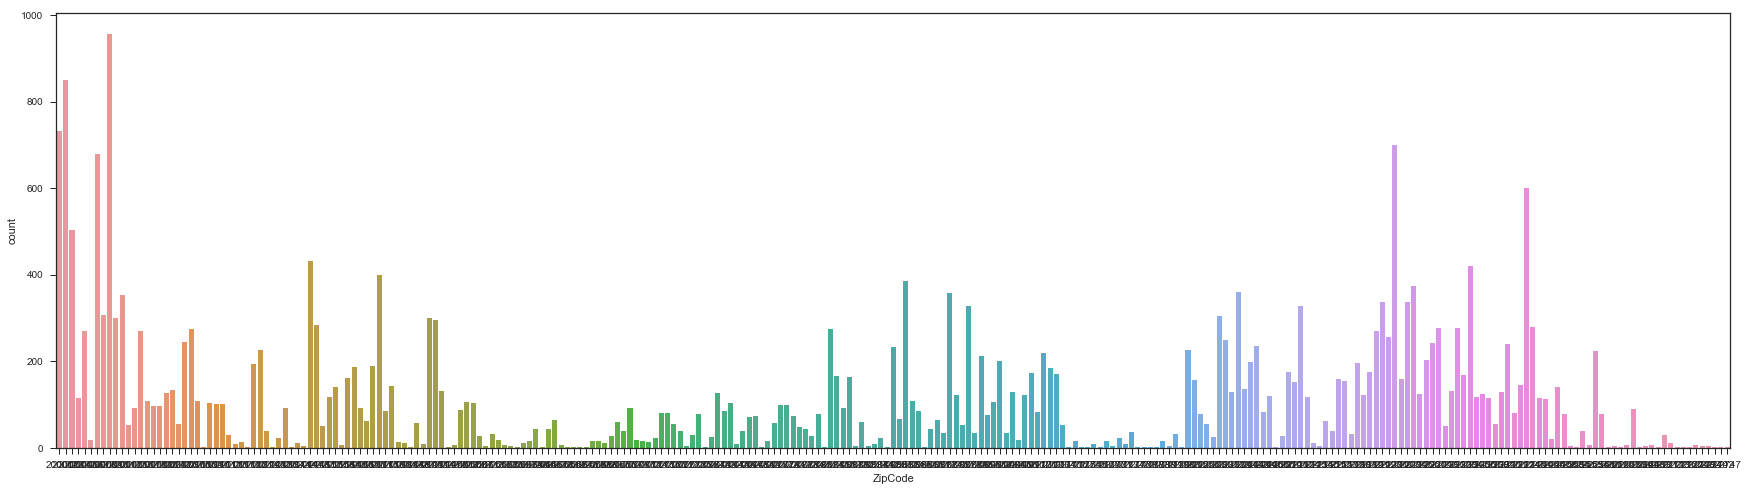

In [1081]:
plt.figure(figsize = (30, 8))
zipcode_count = sns.countplot(data=trulia, x="ZipCode")

### 5. Explore relationship of "English Basements" in terms of price and location 

Below I will replicate the same EDA that occured for the original data set but this time for  the english basement dataset.  

In [1082]:
english_basements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 15 columns):
PropertyID               1113 non-null int64
ListingDate              1113 non-null object
Latitude                 1113 non-null int64
Longitude                1113 non-null int64
ZipCode                  1113 non-null int64
CityName                 1113 non-null object
CountyName               1113 non-null object
StateName                1113 non-null object
CountyListingCoverage    1113 non-null object
LeasePriceDollarCnt      1113 non-null float64
LeaseTermMonths          1113 non-null int64
FinishedSquareFeet       1113 non-null int64
Bedrooms                 1113 non-null float64
Bathrooms                1113 non-null float64
ListingDescription       1113 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 130.5+ KB


Text(0.5,1,'Correlation')

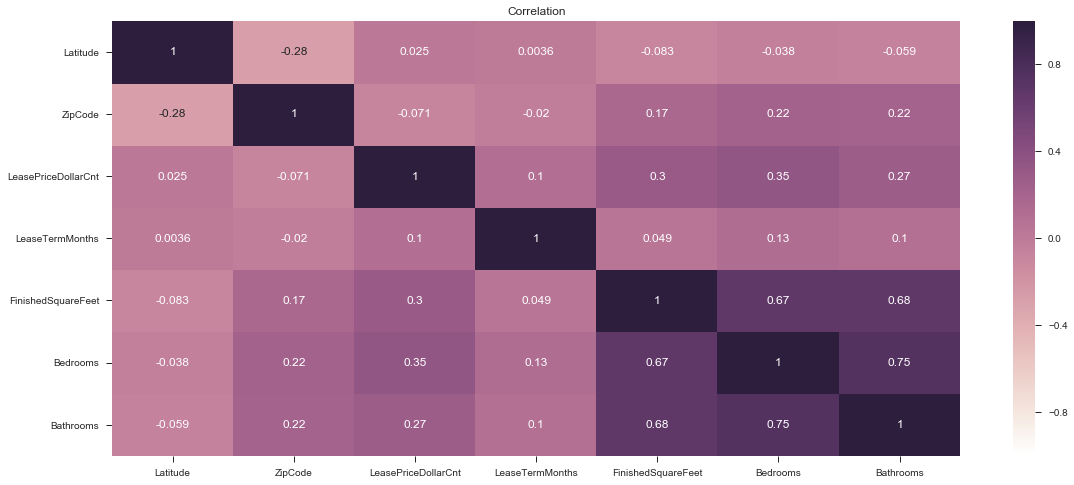

In [1083]:

english_basement_correlation = english_basements_df.filter(["Latitude", "Longitutde", "ZipCode",\
                      "LeasePriceDollarCnt", "LeaseTermMonths", \
                      "FinishedSquareFeet", "Bedrooms", "Bathrooms"])

plt.figure(figsize = (19, 8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(english_basement_correlation.corr(), cmap=cmap, annot=True).set_title("Correlation")



The correlations between the original dataset and the new dataset that features english basements looks the same.  




In [1084]:
eb_average_bathrooms = round(english_basements_df.Bathrooms.mean(),2)
eb_average_bedrooms = round(english_basements_df.Bedrooms.mean(),2)
eb_average_sq_ft = round(english_basements_df.FinishedSquareFeet.mean(),2)
eb_average_lease = round(english_basements_df.LeasePriceDollarCnt.mean(), 2)

print ("The average amount of Bathrooms is {}".format(eb_average_bathrooms))
print()
print ("The average amount of Bedrooms is {}".format(eb_average_bedrooms))
print()
print ("The average square feet of properties is {} sq ft".format(eb_average_sq_ft))
print()
print ("The price expected to pay for lease per rental per month is ${}".format(eb_average_lease))

The average amount of Bathrooms is 2.25

The average amount of Bedrooms is 2.7

The average square feet of properties is 1537.41 sq ft

The price expected to pay for lease per rental per month is $2431.46


## Drumroll...

## The top 10 cities with the most English basements ....

In [1085]:
top_10_cities = english_basements_df["CityName"].value_counts().head(10)
print("\nThe Top 10 Cities that Feature English \nBasements in the DC Metro Area are \n\n{}".format(top_10_cities))


The Top 10 Cities that Feature English 
Basements in the DC Metro Area are 

Washington       369
Arlington         76
Silver Spring     46
Alexandria        40
Fairfax           29
Falls Church      29
Woodbridge        27
Mc Lean           23
Germantown        22
Frederick         20
Name: CityName, dtype: int64


In [1123]:
top_10_cities = pd.DataFrame(english_basements_df["CityName"].value_counts().head(10))

new_index = range(1, len(top_10_zips) + 1)

top_10_cities["City_Name"] = top_10_cities.index
top_10_cities.rename(columns={"CityName": "Count"}, inplace=True)

top_10_cities.columns


Index(['Count', 'City_Name'], dtype='object')

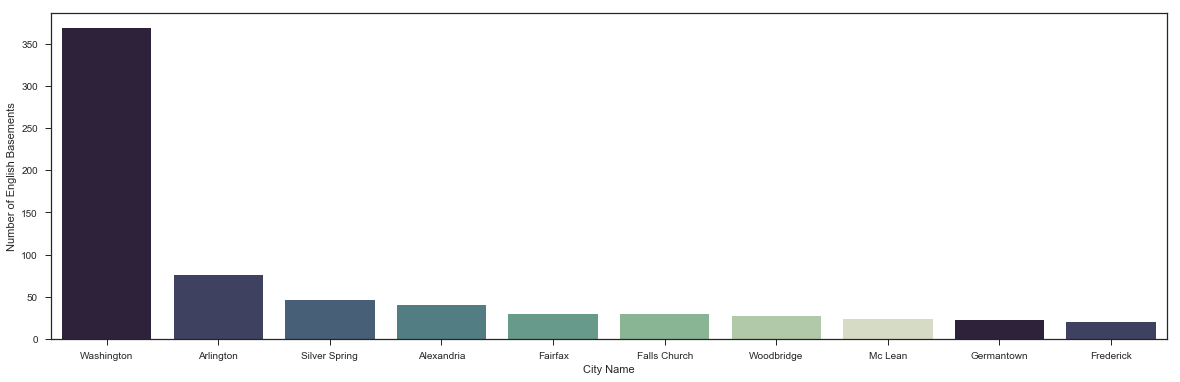

In [1124]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True)
sns.set_palette(cmap)
plt.figure(figsize = (20, 6))
ax = sns.barplot(x = top_10_cities["City_Name"],\
            y= top_10_cities["Count"],\
            palette=cmap\
            
           )
ax.set(xlabel='City Name', ylabel='Number of English Basements')

plt.show()

## The top 10 zipcodes  with the most English basements ....

In [1125]:
top_10_zips = english_basements_df["ZipCode"].value_counts().head(10)
print("\nThe Top 10 Zipcodes that Feature English \nBasements in the DC Metro Area are \n\n{}".format(top_10_zips))


The Top 10 Zipcodes that Feature English 
Basements in the DC Metro Area are 

20002    68
20011    58
20009    38
20010    37
20007    30
20003    29
20001    27
22201    19
22102    17
20874    17
Name: ZipCode, dtype: int64


In [1126]:
top_10_zips = pd.DataFrame(english_basements_df["ZipCode"].value_counts().head(10))

new_index = range(1, len(top_10_zips) + 1)

top_10_zips["Zipcode"] = top_10_zips.index
top_10_zips.rename(columns={"ZipCode": "Count"}, inplace=True)

top_10_zips.columns


Index(['Count', 'Zipcode'], dtype='object')

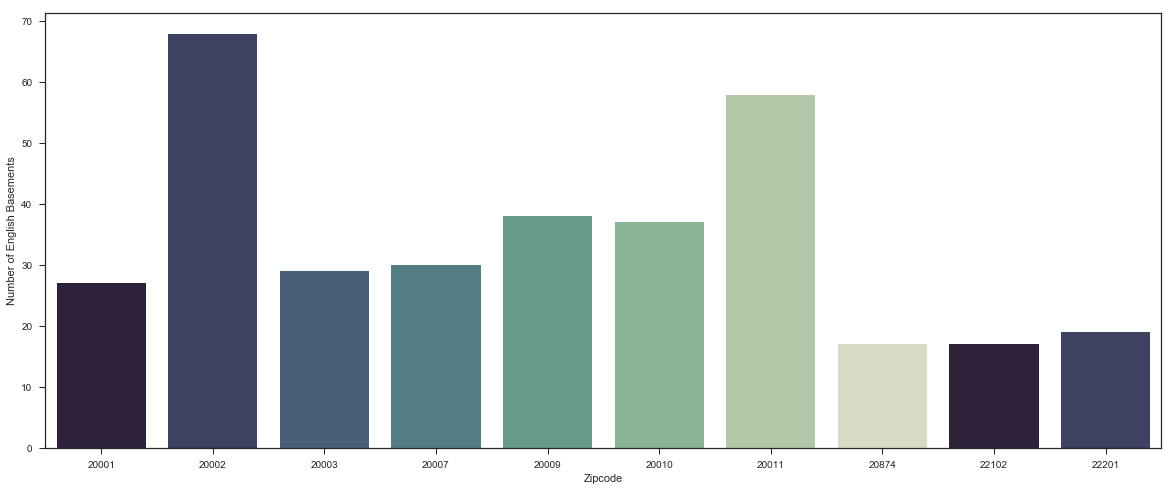

In [1127]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True)
sns.set_palette(cmap)
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = top_10_zips["Zipcode"],\
            y= top_10_zips["Count"],\
            palette=cmap\
            
           )
ax.set(xlabel='Zipcode', ylabel='Number of English Basements')

plt.show()

#### How much more/less should a renter expect to pay for an english basement ? 

To compare the prices, I will need to drop the basement apartments and english basements from the original data set, I will call this new data frame trulia_no_basements

In [1128]:
# basement_apartment = trulia[trulia.ListingDescription.str.contains(r'(B|b).\w+(ment)\s(A|p).\w+(ment)')]

#inverse of that is trulia[~trulia.ListingDescription.str.contains(r'(B|b).\w+(ment)\s(A|p).\w+(ment)')]

trulia_no_basements = trulia[~trulia.ListingDescription.str.contains(r'(B|b).\w+(ment)\s(A|p).\w+(ment)')]
#english_basement = trulia[trulia.ListingDescription.str.contains(r'(E|e).\w+\s(B|b).\w+(ment)')]

#inverse of that is trulia[~trulia.ListingDescription.str.contains(r'(E|e).\w+\s(B|b).\w+(ment)')]

trulia_no_basements = trulia_no_basements[~trulia_no_basements.ListingDescription.str.contains(r'(E|e).\w+\s(B|b).\w+(ment)')]

#want to ensure that I'm subtracting the correct number of values from the dataframe 
trulia_shape = trulia.shape[0]

trulia_no_basements_shape = trulia_no_basements.shape[0]

trulia_shape - trulia_no_basements_shape



1113

In [1129]:
no_basement_avg_lease = round(trulia_no_basements["LeasePriceDollarCnt"].mean(),2)


english_basements_avg_lease = round(english_basements_df["LeasePriceDollarCnt"].mean(),2)

#Time to check out the Average Lease price  english basements vs no english basement
print("The average lease price per properties that have no English Basements is  ${}. \n\
While the average price per English Basement properity is ${}".format(no_basement_avg_lease, \
                                                                     english_basements_avg_lease))


The average lease price per properties that have no English Basements is  $2260.35. 
While the average price per English Basement properity is $2431.46


In [1130]:
The reason why the Lease amount is higher for English Basements is location for one and also 

SyntaxError: invalid syntax (<ipython-input-1130-03f8b78393bd>, line 1)

In [1131]:
english_basements_df["Bedrooms"].mean()
english_basements_df["FinishedSquareFeet"].mean()


1537.4123989218328

In [1132]:
trulia["Bedrooms"].mean()
trulia["FinishedSquareFeet"].mean()


1456.516561730085

In [1133]:
#To fully answer this question I must look at the average price per property per CityName 





This is the distribution of properties that do not advertise or have English basements


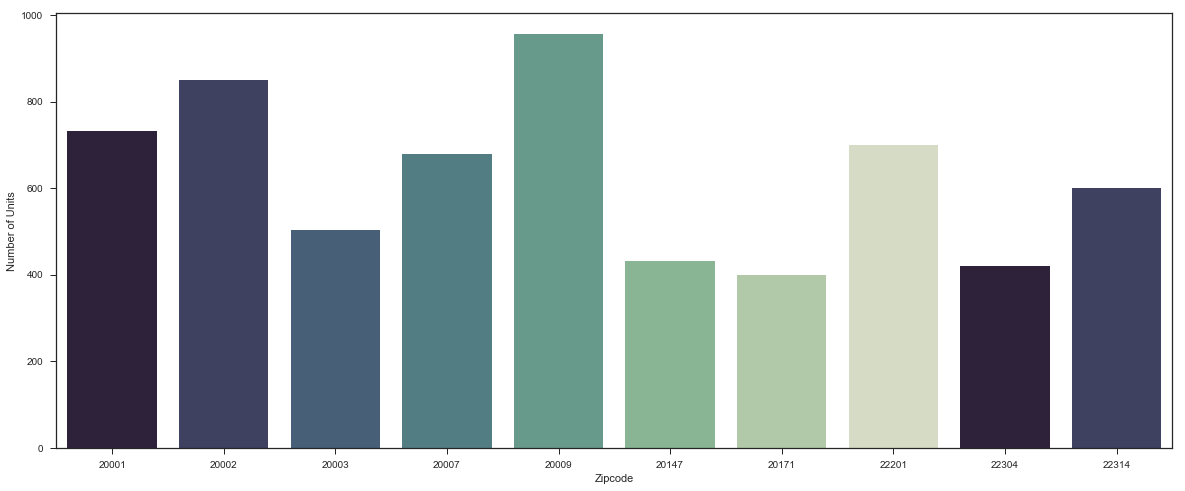

In [1134]:
print("This is the distribution of properties that do not advertise or have English basements")

new_index = range(1, len(grouping_trulia_top_zip) + 1)

grouping_trulia_top_zip["Zipcode"] = grouping_trulia_top_zip.index

grouping_trulia_top_zip.rename(columns={"ZipCode": "Count"}, inplace=True)

grouping_trulia_top_zip.columns

cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True)
sns.set_palette(cmap)
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = top_10_zips_trulia["Zipcode"],\
            y= grouping_trulia_top_zip["Count"],\
            palette=cmap\
            
           )
ax.set(xlabel='Zipcode', ylabel="Number of Units")

plt.show()



Compared to properties that feature or list English Basements.  You'll notice the higest number of 
properties are in the 20002 area, which is Washington DC. 


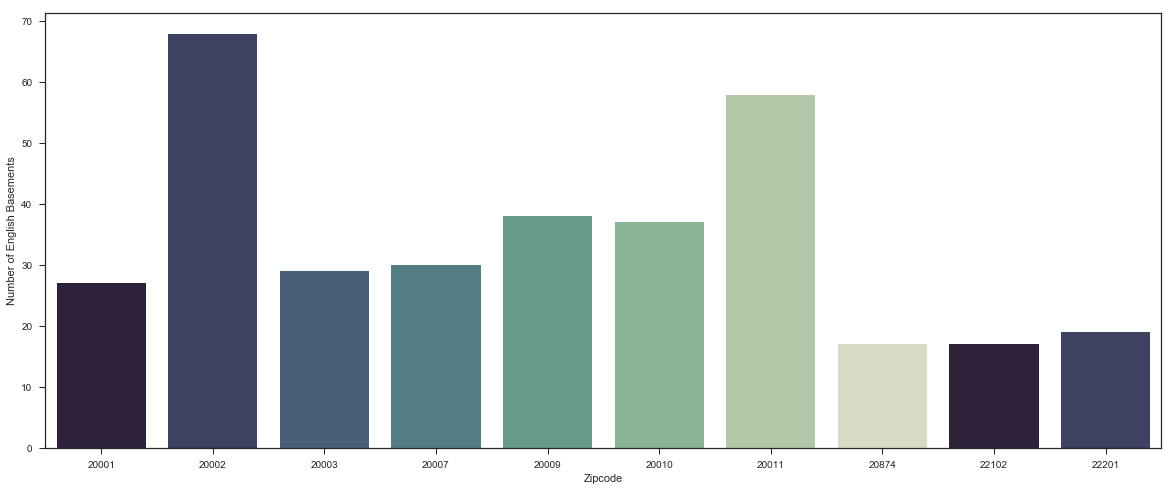

In [1135]:
print("Compared to properties that feature or list English Basements.  You'll notice the higest number of \n\
properties are in the 20002 area, which is Washington DC. ")
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True)
sns.set_palette(cmap)
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = top_10_zips["Zipcode"],\
            y= top_10_zips["Count"],\
            palette=cmap\
            
           )
ax.set(xlabel='Zipcode', ylabel='Number of English Basements')

plt.show()

To be more specific, it's a good idea to see what average lease prices are in 20002 versus lease prices for English bedrooms in 20002 and in general. 

In [1136]:
trulia_20002 = trulia[(trulia.ZipCode == 20002)]

trulia_avg_lease_20002 = round(trulia_20002["LeasePriceDollarCnt"].mean(),2)

eb_20002 = english_basements_df[(english_basements_df.ZipCode == 20002)]

eb_avg_lease_20002 = round(eb_20002["LeasePriceDollarCnt"].mean(),2)

In [1137]:
print("The average lease price for a property in 20002 is ${},\n\
while the average price of an English Basement property in 20002 is ${}".format\
     (trulia_avg_lease_20002, eb_avg_lease_20002))

The average lease price for a property in 20002 is $2649.87,
while the average price of an English Basement property in 20002 is $2511.87


In [1138]:
(trulia_avg_lease_20002 - eb_avg_lease_20002)



138.0

So, in Washington DC it's cheaper by $130 a month to rent an English Basement. But, now it's time to look at all the areas and compare prices.  

In [1183]:
avg_lease = round(trulia["LeasePriceDollarCnt"].mean(),2)
avg_eb_lease = round(english_basements_df["LeasePriceDollarCnt"].mean(),2)

avg_savings = round(avg_eb_lease - avg_lease, 2)

print("You're looking to save on average ${} by renting an English Basement.\n\n".format(avg_savings))


You're looking to save on average $164.59 by renting an English Basement.




In [1139]:
#This is just some code I wrote incase to recycle etc .... 

#grouping_trulia_zip = trulia["LeasePriceDollarCnt"].groupby(trulia["ZipCode"]).mean()
#grouping_trulia_cityname = trulia["LeasePriceDollarCnt"].groupby(trulia["CityName"]).mean()
#grouping_trulia_top_zip = pd.DataFrame(trulia["ZipCode"].value_counts().head(10))
#grouping_trulia_top_cityname = pd.DataFrame(trulia["CityName"].value_counts().head(10))



#grouping_eb_zip = english_basements_df["LeasePriceDollarCnt"].groupby(english_basements_df["ZipCode"]).mean()
#grouping_eb_cityname = english_basements_df["LeasePriceDollarCnt"].groupby(english_basements_df["CityName"]).mean()
#grouping_eb_top_zip = pd.DataFrame(trulia["ZipCode"].value_counts().head(10))
#grouping_trulia_top_cityname = pd.DataFrame(trulia["CityName"].value_counts().head(10))


## Premiums & Discounts
To find out the premiums I am going to create first 2 DataFrames.  The DataFrames will feature Zipcode and average Lease price. I will rename the columnns with Lease Price for each DataFrame to reflect english basement, no english basement.  

Next, I will concatinate the DataFrames.  I will then create a new column that will house the difference in price between the english basement, no english basement. The last step will be to sort the values by ascending and decending to see which Zipcodes have the largest discounts and the largest premiums.  

I will repeate the process for City Names as well 

#### Premiums & Discounts by City Name

In [1140]:
#create dataframes 
grouping_trulia_zip_df = pd.DataFrame(trulia_no_basements["LeasePriceDollarCnt"].groupby(trulia_no_basements["ZipCode"]).mean())

grouping_eb_zip_df = pd.DataFrame(english_basements_df["LeasePriceDollarCnt"].groupby(english_basements_df["ZipCode"]).mean())


#re-name columns and reset index 
grouping_trulia_zip_df.rename(columns={"LeasePriceDollarCnt": "No_EB_avg_lease"}, inplace=True)
grouping_trulia_zip_df.reset_index(level=0, inplace=True)



grouping_eb_zip_df.rename(columns={"LeasePriceDollarCnt": "EB_avg_lease"}, inplace=True)
grouping_eb_zip_df.reset_index(level=0, inplace=True)




In [1141]:
#merge data set on Zipcode column 

avg_lease_by_zip = pd.merge(grouping_trulia_zip_df,\
                 grouping_eb_zip_df,\
                 on="ZipCode")

avg_lease_by_zip.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 3 columns):
ZipCode            171 non-null int64
No_EB_avg_lease    171 non-null float64
EB_avg_lease       171 non-null float64
dtypes: float64(2), int64(1)
memory usage: 5.3 KB


In [1142]:
#create a new colum with (No_EB_avg_lease - EB_avg_lease)

avg_lease_by_zip["Difference"] = avg_lease_by_zip["No_EB_avg_lease"] - avg_lease_by_zip["EB_avg_lease"]#.shift(-1)

avg_lease_by_zip.head()

,ZipCode,No_EB_avg_lease,EB_avg_lease,Difference
0,20001,2796.749629,2480.296296,316.453333
1,20002,2661.885116,2511.867647,150.017469
2,20003,2916.671864,2800.689655,115.982209
3,20005,2700.747759,2255.000000,445.747759
4,20007,3137.897743,3895.042510,-757.144767


In [1172]:
#Time to sort the values, highest and lowest, but first need to set index  as ZipCode

In [1151]:
avg_lease_by_zip.set_index("ZipCode", inplace=True)

In [1156]:
eb_more_expensive = avg_lease_by_zip["Difference"].sort_values(ascending=True).head(10)

eb_more_expensive
print("In these Zipcodes, English Basements are more expensive \n\n{}"\
.format(eb_more_expensive))

In these Zipcodes, English Basements are more expensive 

ZipCode
20816   -6445.857143
20815   -1450.699921
20640   -1044.166667
20708    -844.705882
22044    -820.527426
21773    -804.512647
20007    -757.144767
20036    -745.597916
22043    -731.759825
20009    -724.141665
Name: Difference, dtype: float64


In [1157]:
eb_cheaper = avg_lease_by_zip["Difference"].sort_values(ascending=False).head(10)
print("In these Zipcodes, you get the most for your money for English Basements. \
The greatest savings are located here\n\n{}"\
.format(eb_cheaper))

In these Zipcodes, you get the most for your money for English Basements. The greatest savings are located here

ZipCode
20151    1288.480000
20720    1069.301887
20607     955.000000
22734     833.333333
20695     736.153846
22079     668.637427
20603     640.097087
20748     591.319444
20781     573.910389
22027     568.342857
Name: Difference, dtype: float64


#### Premiums & Discounts by City Name

In [1162]:
#create dataframes 
grouping_trulia_city_df = pd.DataFrame(trulia_no_basements["LeasePriceDollarCnt"].groupby(trulia_no_basements["CityName"]).mean())

grouping_eb_city_df = pd.DataFrame(english_basements_df["LeasePriceDollarCnt"].groupby(english_basements_df["CityName"]).mean())


#re-name columns and reset index 
grouping_trulia_city_df.rename(columns={"LeasePriceDollarCnt": "No_EB_avg_lease"}, inplace=True)
grouping_trulia_city_df.reset_index(level=0, inplace=True)



grouping_eb_city_df.rename(columns={"LeasePriceDollarCnt": "EB_avg_lease"}, inplace=True)
grouping_eb_city_df.reset_index(level=0, inplace=True)

#merge data set on Zipcode column 

avg_lease_by_city = pd.merge(grouping_trulia_city_df,\
                 grouping_eb_city_df,\
                 on="CityName")



#avg_lease_by_zip.set_index("CityName", inplace=True)



In [1171]:
avg_lease_by_city["Difference"] = avg_lease_by_city["No_EB_avg_lease"] - avg_lease_by_city["EB_avg_lease"]#.shift(-1)
avg_lease_by_city.head()


,No_EB_avg_lease,EB_avg_lease,Difference
CityName,,,
Accokeek,2207.083333,1450.000000,757.083333
Alexandria,2287.634375,2687.400000,-399.765625
Annandale,2159.018018,1763.750000,395.268018
Arlington,2552.181670,2929.539474,-377.357804
Ashburn,2104.796601,2275.000000,-170.203399


In [1168]:
avg_lease_by_city.set_index("CityName", inplace=True)


In [1169]:
eb_more_expensive_city = avg_lease_by_city["Difference"].sort_values(ascending=True).head(10)

eb_more_expensive_city
print("In these Zipcodes, English Basements are more expensive \n\n{}"\
.format(eb_more_expensive_city))

In these Zipcodes, English Basements are more expensive 

CityName
Bethesda              -1482.001807
Laurel                -1168.531532
Indian Head           -1044.166667
Travilah               -966.666667
Myersville             -804.512647
Mount Airy             -580.447368
Mount Rainier          -526.666667
Manassas Park          -491.793103
Chevy Chase Terrace    -455.286516
Rockville              -437.287582
Name: Difference, dtype: float64


In [1184]:
eb_cheaper_city = avg_lease_by_city["Difference"].sort_values(ascending=False).head(10)
print("In these Zipcodes, you get the most for your money for English Basements. \
The greatest savings are located here\n\n{}"\
.format(eb_cheaper_city))

In these Zipcodes, you get the most for your money for English Basements. The greatest savings are located here

CityName
Accokeek            757.083333
White Plains        738.333333
Chantilly           712.364706
Lorton              653.359649
Temple Hills        601.042857
Triangle            591.800000
Bowie               558.707031
Dunn Loring         505.842857
North Kensington    474.843750
Hyattsville         438.022745
Name: Difference, dtype: float64


# Limitations of the Data & Assumptions of my Analysis

The largest limitations I noticed were in the ListingDescripion and LeasePriceDollarCnt.  Had I been given more time, 
I would have found a better way to parse the text data.  It's very likely that I missed some records with my regular
expressions, even though I tested them on data before using them.   In addition to maybe missing data, the way the
listings were created, I may have cast too wide of a net.  Some of the descriptions that mentioned "English Basements,"
were for entire house listings that happened to feature a seperate basement for rent.  So had I identfied and created
better patterns to parse the data, I may have been more specific with my regular expressions.  

I think doing a proximity analysis would have really aided my research.  I could have looked at the prices
in terms of distance from a particular location. For instance, I would have calculate the Haversine distance 
between the latitude and longitude of listings and from a predetermined centeroid (Center of DC for instance). 

